Métodos numéricos usando Python (SciPy)
======================================

Visão geral
--------

O núcleo da linguagem Python (incluindo as bibliotecas padrão) fornece funcionalidades suficiente para realizar as tarefas de pesquisa computacional. No entanto, existem bibliotecas Python dedicadas (de terceiros) que oferecem funcionalidades estendidas:

- ferramentas numéricas para tarefas freqüentes

- que são convenientes

- e mais eficientes em termos de tempo de processamento e requisitos de memória do que as funcionalidades do Python operando sozinhas.

Nós enumeramos três desses módulos, em particular:

- o módulo NumPy fornece um tipo de dado especializado para operar numericamente com vetores e matrizes (este é o tipo `array` fornecido pelo NumPy) além de ferramentas de álgebra linear.

- o módulo Matplotlib (também conhecido como Pylab) fornece recursos de plotagem e visualização e 

- o módulo `SciPy` (*SCIentific PYthon*), que fornece uma infinidade de algoritmos numéricos (introduzido neste capítulo).

Muitos dos algoritmos numéricos disponíveis através do SciPy e NumPy são fornecidos por bibliotecas compiladas estabelecidas que são muitas vezes escritas em Fortran ou C. Eles, por sua vez, serão executados muito mais rápido do que o código Python puro (interpretado). Como regra geral, esperamos que o código compilado seja duas ordens de magnitude mais rápido do que o código Python puro.

Você pode usar a função de ajuda para cada método numérico para descobrir mais sobre a origem da implementação.

SciPy
-----

O SciPy é construído com base no NumPy. Toda a funcionalidade do NumPy parece estar disponível também no SciPy. Por exemplo, em vez de:

In [25]:
import numpy
x = numpy.arange(0, 10, 0.1)
y = numpy.sin(x)

podemos também usar:

In [26]:
import scipy as s
x = s.arange(0, 10, 0.1)
y = s.sin(x)

Primeiro, precisamos importar o SciPy

In [27]:
import scipy as s

O pacote SciPy fornece informações sobre sua própria estrutura quando usamos o comando de ajuda:

```python
help(scipy)
```

A saída é muito longa. Então, estamos mostrando apenas parte dela aqui:

    stats       --- Statistical Functions [*]
    sparse      --- Sparse matrix [*]
    lib         --- Python wrappers to external libraries [*]
    linalg      --- Linear algebra routines [*]
    signal      --- Signal Processing Tools [*]
    misc        --- Various utilities that don't have another home.
    interpolate --- Interpolation Tools [*]
    optimize    --- Optimization Tools [*]
    cluster     --- Vector Quantization / Kmeans [*]
    fftpack     --- Discrete Fourier Transform algorithms [*]
    io          --- Data input and output [*]
    integrate   --- Integration routines [*]
    lib.lapack  --- Wrappers to LAPACK library [*]
    special     --- Special Functions [*]
    lib.blas    --- Wrappers to BLAS library [*]
      [*] - using a package requires explicit import (see pkgload)

Se estivermos procurando por um algoritmo para integrar uma função, podemos explorar o pacote `integrate`:

```python
import scipy.integrate

scipy.integrate?
```

produz:

```text
=============================================
Integration and ODEs (:mod:`scipy.integrate`)
=============================================

.. currentmodule:: scipy.integrate

Integrating functions, given function object
============================================

.. autosummary::
   :toctree: generated/

   quad          -- General purpose integration
   dblquad       -- General purpose double integration
   tplquad       -- General purpose triple integration
   nquad         -- General purpose n-dimensional integration
   fixed_quad    -- Integrate func(x) using Gaussian quadrature of order n
   quadrature    -- Integrate with given tolerance using Gaussian quadrature
   romberg       -- Integrate func using Romberg integration
   quad_explain  -- Print information for use of quad
   newton_cotes  -- Weights and error coefficient for Newton-Cotes integration
   IntegrationWarning -- Warning on issues during integration

Integrating functions, given fixed samples
==========================================

.. autosummary::
   :toctree: generated/

   trapz         -- Use trapezoidal rule to compute integral.
   cumtrapz      -- Use trapezoidal rule to cumulatively compute integral.
   simps         -- Use Simpson's rule to compute integral from samples.
   romb          -- Use Romberg Integration to compute integral from
                 -- (2**k + 1) evenly-spaced samples.

.. seealso::

   :mod:`scipy.special` for orthogonal polynomials (special) for Gaussian
   quadrature roots and weights for other weighting factors and regions.

Integrators of ODE systems
==========================

.. autosummary::
   :toctree: generated/

   odeint        -- General integration of ordinary differential equations.
   ode           -- Integrate ODE using VODE and ZVODE routines.
   complex_ode   -- Convert a complex-valued ODE to real-valued and integrate.
```

As seções seguintes mostram exemplos que demonstram como empregar os algoritmos fornecidos pelo SciPy.

Integração numérica
---------------------

O SciPy fornece uma série de rotinas de integração. Uma ferramenta com a finalidade de resolver integrais *I* do tipo

$$ I = \int_a^b f(x) \, dx $$

é fornecida pela função `quad()` do módulo `scipy.integrate`.

Ela usa como argumento de entrada, a função a ser integrada $ f(x) $ ("integrando") e os limites inferior $ a $ e superior $ b $. Ela retorna dois valores (em uma tupla): o primeiro é o resultado calculado e o segundo é uma estimativa do erro numérico desse resultado.

Aqui está um exemplo que produz esta saída:

In [1]:
from math import cos, exp, pi
from scipy.integrate import quad

# função a ser integrada
def f(x):
    return exp(cos(-2 * x * pi)) + 3.2

# chamamos quad para integrar f de -2 a 2
res, err = quad(f, -2, 2)

print("O resultado numérico é {:f} (+-{:g})".format(res, err))

O resultado numérico é 17.864264 (+-1.55113e-11)


Note que `quad()` usa os parâmetros opcionais `epsabs` e `epsrel` para aumentar ou diminuir a precisão de sua computação. (Use `help(quad)` para saber mais.) Os valores padrão são `epsabs = 1.5e-8` e `epsrel = 1.5e-8`. Para o próximo exercício, os valores padrão são suficientes.

### Exercício: integrar uma função

1. Usando a função `quad` do SciPy, escreva um programa que resolva numericamente o seguinte: $I = \int_0^1 \cos(2\pi x) \, dx$.

2. Encontre a integral analítica e compare-a com a solução numérica.

3. Por que é importante ter uma estimativa da precisão (ou o erro) da integral numérica?

### Exercício: plote antes de integrar

É uma boa prática plotar a função integrando para verificar se ela é "bem comportada" antes de tentar integrá-la. Singularidades (ou seja, valores de $x$ para os quais $f(x)$ tende para menos ou mais infinito) ou outro comportamento irregular (como $f(x) = \sin(\frac{1}{x}$) perto de $x = 0$) são difíceis de manusear numericamente.

1. Escreva uma função com o nome `plotquad` que leva os mesmos argumentos que o comando quad (i.e. $f$, $a$ e $b$) e que
- (i) crie um gráfico do integrando $f(x)$ e
- (ii) calcule a integral numérica usando a função `quad`. Os valores de retorno devem ser como aqueles para a função `quad`.

Resolvendo equações diferenciais ordinárias (EDOs)
---------------------------------------

Para resolver uma EDO do tipo
$$\frac{dy}{dt}(t) = f(y,t)$$

com uma dada condição inicial $y(t_0) = y_0$, podemos usar a função `odeint` do SciPy. Aqui está um programa de exemplo auto-explicativo (`useodeint.py`) para encontar

$$y(t) \quad \mathrm{para} \quad t \in [0,2]$$
dada a EDO :
$$\frac{dy}{dt}(t) = -2yt \quad \mathrm{com} \quad y(0) = 1.$$

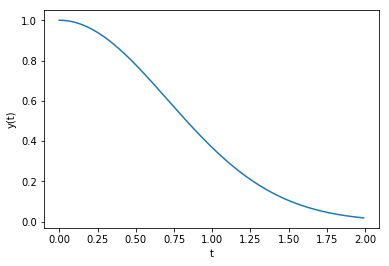

In [2]:
%matplotlib inline
from scipy.integrate import odeint
import numpy as N

def f(y, t):
    """este é o lado direito da EDO a ser integrada, i.e. dy/dt = f(y,t)"""
    return -2 * y * t

y0 = 1             # valor inicial
a = 0              # limites de integração para t
b = 2

t = N.arange(a, b, 0.01)  # valores de t para
                          # os quais queremos
                          # a solução y(t)
y = odeint(f, y0, t)  # cálculo de y(t)

import pylab          # plotagem dos resultados
pylab.plot(t, y)
pylab.xlabel('t'); pylab.ylabel('y(t)')

O comando `odeint` usa uma série de parâmetros opcionais para alterar a tolerância padrão de erro da integração (e para acionar a produção de saída de depuração). Use o comando de ajuda para explorá-los:

```python
help(scipy.integrate.odeint)
```

irá mostrar:

```
Help on function odeint in module scipy.integrate.odepack:

odeint(func, y0, t, args=(), Dfun=None, col_deriv=0, full_output=0, ml=None, mu=None, rtol=None, atol=None, tcrit=None, h0=0.0, hmax=0.0, hmin=0.0, ixpr=0, mxstep=0, mxhnil=0, mxordn=12, mxords=5, printmessg=0)
    Integrate a system of ordinary differential equations.
    
    Solve a system of ordinary differential equations using lsoda from the
    FORTRAN library odepack.
    
    Solves the initial value problem for stiff or non-stiff systems
    of first order ode-s::
    
        dy/dt = func(y, t0, ...)
    
    where y can be a vector.
    
    *Note*: The first two arguments of ``func(y, t0, ...)`` are in the
    opposite order of the arguments in the system definition function used
    by the `scipy.integrate.ode` class.
    
    Parameters
    ----------
    func : callable(y, t0, ...)
        Computes the derivative of y at t0.
    y0 : array
        Initial condition on y (can be a vector).
    t : array
        A sequence of time points for which to solve for y.  The initial
        value point should be the first element of this sequence.
    args : tuple, optional
        Extra arguments to pass to function.
    Dfun : callable(y, t0, ...)
        Gradient (Jacobian) of `func`.
    col_deriv : bool, optional
        True if `Dfun` defines derivatives down columns (faster),
        otherwise `Dfun` should define derivatives across rows.
    full_output : bool, optional
        True if to return a dictionary of optional outputs as the second output
    printmessg : bool, optional
        Whether to print the convergence message
    
    Returns
    -------
    y : array, shape (len(t), len(y0))
        Array containing the value of y for each desired time in t,
        with the initial value `y0` in the first row.
    infodict : dict, only returned if full_output == True
        Dictionary containing additional output information
    
        =======  ============================================================
        key      meaning
        =======  ============================================================
        'hu'     vector of step sizes successfully used for each time step.
        'tcur'   vector with the value of t reached for each time step.
                 (will always be at least as large as the input times).
        'tolsf'  vector of tolerance scale factors, greater than 1.0,
                 computed when a request for too much accuracy was detected.
        'tsw'    value of t at the time of the last method switch
                 (given for each time step)
        'nst'    cumulative number of time steps
        'nfe'    cumulative number of function evaluations for each time step
        'nje'    cumulative number of jacobian evaluations for each time step
        'nqu'    a vector of method orders for each successful step.
        'imxer'  index of the component of largest magnitude in the
                 weighted local error vector (e / ewt) on an error return, -1
                 otherwise.
        'lenrw'  the length of the double work array required.
        'leniw'  the length of integer work array required.
        'mused'  a vector of method indicators for each successful time step:
                 1: adams (nonstiff), 2: bdf (stiff)
        =======  ============================================================
    
    Other Parameters
    ----------------
    ml, mu : int, optional
        If either of these are not None or non-negative, then the
        Jacobian is assumed to be banded.  These give the number of
        lower and upper non-zero diagonals in this banded matrix.
        For the banded case, `Dfun` should return a matrix whose
        rows contain the non-zero bands (starting with the lowest diagonal).
        Thus, the return matrix `jac` from `Dfun` should have shape
        ``(ml + mu + 1, len(y0))`` when ``ml >=0`` or ``mu >=0``.
        The data in `jac` must be stored such that ``jac[i - j + mu, j]``
        holds the derivative of the `i`th equation with respect to the `j`th
        state variable.  If `col_deriv` is True, the transpose of this
        `jac` must be returned.
    rtol, atol : float, optional
        The input parameters `rtol` and `atol` determine the error
        control performed by the solver.  The solver will control the
        vector, e, of estimated local errors in y, according to an
        inequality of the form ``max-norm of (e / ewt) <= 1``,
        where ewt is a vector of positive error weights computed as
        ``ewt = rtol * abs(y) + atol``.
        rtol and atol can be either vectors the same length as y or scalars.
        Defaults to 1.49012e-8.
    tcrit : ndarray, optional
        Vector of critical points (e.g. singularities) where integration
        care should be taken.
    h0 : float, (0: solver-determined), optional
        The step size to be attempted on the first step.
    hmax : float, (0: solver-determined), optional
        The maximum absolute step size allowed.
    hmin : float, (0: solver-determined), optional
        The minimum absolute step size allowed.
    ixpr : bool, optional
        Whether to generate extra printing at method switches.
    mxstep : int, (0: solver-determined), optional
        Maximum number of (internally defined) steps allowed for each
        integration point in t.
    mxhnil : int, (0: solver-determined), optional
        Maximum number of messages printed.
    mxordn : int, (0: solver-determined), optional
        Maximum order to be allowed for the non-stiff (Adams) method.
    mxords : int, (0: solver-determined), optional
        Maximum order to be allowed for the stiff (BDF) method.
    
    See Also
    --------
    ode : a more object-oriented integrator based on VODE.
    quad : for finding the area under a curve.
    
    Examples
    --------
    The second order differential equation for the angle `theta` of a
    pendulum acted on by gravity with friction can be written::
    
        theta''(t) + b*theta'(t) + c*sin(theta(t)) = 0
    
    where `b` and `c` are positive constants, and a prime (') denotes a
    derivative.  To solve this equation with `odeint`, we must first convert
    it to a system of first order equations.  By defining the angular
    velocity ``omega(t) = theta'(t)``, we obtain the system::
    
        theta'(t) = omega(t)
        omega'(t) = -b*omega(t) - c*sin(theta(t))
    
    Let `y` be the vector [`theta`, `omega`].  We implement this system
    in python as:
    
    >>> def pend(y, t, b, c):
    ...     theta, omega = y
    ...     dydt = [omega, -b*omega - c*np.sin(theta)]
    ...     return dydt
    ...
    
    We assume the constants are `b` = 0.25 and `c` = 5.0:
    
    >>> b = 0.25
    >>> c = 5.0
    
    For initial conditions, we assume the pendulum is nearly vertical
    with `theta(0)` = `pi` - 0.1, and it initially at rest, so
    `omega(0)` = 0.  Then the vector of initial conditions is
    
    >>> y0 = [np.pi - 0.1, 0.0]
    
    We generate a solution 101 evenly spaced samples in the interval
    0 <= `t` <= 10.  So our array of times is:
    
    >>> t = np.linspace(0, 10, 101)
    
    Call `odeint` to generate the solution.  To pass the parameters
    `b` and `c` to `pend`, we give them to `odeint` using the `args`
    argument.
    
    >>> from scipy.integrate import odeint
    >>> sol = odeint(pend, y0, t, args=(b, c))
    
    The solution is an array with shape (101, 2).  The first column
    is `theta(t)`, and the second is `omega(t)`.  The following code
    plots both components.
    
    >>> import matplotlib.pyplot as plt
    >>> plt.plot(t, sol[:, 0], 'b', label='theta(t)')
    >>> plt.plot(t, sol[:, 1], 'g', label='omega(t)')
    >>> plt.legend(loc='best')
    >>> plt.xlabel('t')
    >>> plt.grid()
    >>> plt.show()

```

### Exercício: usando `odeint`

1. Abra um novo arquivo com o nome `testeEDOInt.py` em um editor de texto.

2. Escreva um programa que calcule a solução $ y(t) $ da EDO seguinte usando o algoritmo `odeint`:
     $$\frac{dy}{dt} = -\exp(-t)(10 \sin(10t) + \cos (10t))$$
      De $t = 0$ a $t = 10$. O valor inicial é $y(0) = 1$.

3. Você deve exibir a solução graficamente nos pontos $t = 0$, $t = 0.01$, $t = 0.02$, ..., $t = 9.99$, $t = 10$.

Localização de raízes
------------

Se você tentar encontrar um $x$ tal que

$$f (x) = 0,$$

então este é um problema chamado de *localização de raízes*. Observe que problemas como $g(x) = h(x)$ caem nesta categoria, pois você pode reescrevê-los como $f(x) = g(x) - h(x) = 0$.

Várias ferramentas para localização de raízes estão disponíveis no módulo `optimize` do SciPy.

### Localização de raiz pelo método de bisecção

Primeiro, apresentamos o algoritmo `bisect`, que é (i) robusto e (ii) lento, mas conceitualmente muito simples.

Suponhamos que precisemos calcular as raízes de  $f(x) = x^3 - 2x^2$. Esta função tem uma raiz dupla em $x = 0$ (isto é trivial de ver) e outra raiz localizada entre $x = 1.5$ (pois $f(1.5) = - 1.125$) e $x = 3$ (pois $f(3) = 9$). É direto ver que esta outra raiz está localizada em $x = 2$. Aqui está um programa que determina esta raiz numericamente:

In [3]:
from scipy.optimize import bisect

def f(x):
    """retorna f(x) = x^3 - 2x^2. Tem raízes em
    x = 0 (raiz dupla) e x = 2"""
    return x ** 3 - 2 * x ** 2

# o programa principal começa aqui
x = bisect(f, 1.5, 3, xtol=1e-6)

print("A raiz x é aproximadamente x=%14.12g,\n"
      "o erro é menor do que 1e-6." % (x))
print("O erro exato é %g." % (2 - x))

A raiz x é aproximadamente x= 2.00000023842,
o erro é menor do que 1e-6.
O erro exato é -2.38419e-07.


O método `bisect()` requer três argumentos obrigatórios: (i) a função $f(x)$, (ii) um limite inferior $a$ (para o qual escolhemos 1.5 no nosso exemplo) e (ii) um limite superior $b$ (para o qual escolhemos 3). O parâmetro opcional `xtol` determina o erro máximo do método.

Um dos requisitos do método da bisecção é que o intervalo $[a,b]$ deve ser escolhido de tal forma que a função seja positiva em $a$ e negativa em $b$, ou que a função seja negativa em $a$ e positiva em $b$. Em outras palavras, $a$ e $b$ devem incluir uma raiz.

### Exercício: localização de raízes usando o método `bisect`

1. Escreva um programa com o nome `sqrt2.py` para determinar uma aproximação para $\sqrt{2}$ encontrando uma raiz $x$ da função $f(x) = 2-x^2$ usando o algoritmo da bisecção. Escolha uma tolerância para a aproximação da raiz de $10^{-8}$.

2. Documente a sua escolha do intervalo inicial $[a, b]$ para a busca da raiz: quais valores você escolheu para $a$ e $b$. Por quê?

3. Estude os resultados:

    - Que valor o algoritmo de bisecção retorna para a raiz $x$?

    - Calcule o valor de $\sqrt{2}$ usando `math.sqrt(2)` e compare-o com a aproximação da raiz. Quão grande é o erro absoluto de $x$? Como isso se compara com `xtol`?

### Localização de raízes usando a função `fsolve`

Um algoritmo (frequentemente) melhor (no sentido de "mais eficiente") do que o algoritmo da bisecção é implementado na função generalizada `fsolve()` para a localização de raízes de funções (multidimensionais). Este algoritmo precisa apenas de um ponto de partida próximo à provável localização da raiz (mas não possui convergência garantida).

Aqui está um exemplo:

In [4]:
from scipy.optimize import fsolve

def f(x):
    return x ** 3 - 2 * x ** 2

x = fsolve(f, 3)           # one root is at x=2.0

print("A raiz x é aproximadamente x=%21.19g" % x)
print("O erro exato é %g." % (2 - x))

A raiz x é aproximadamente x= 2.000000000000006661
O erro exato é -6.66134e-15.


O valor de retorno [6] de `fsolve` é uma matriz numpy de comprimento $n$ para um problema de localização de raízes com $n$ variáveis. No exemplo acima, temos $n = 1$.

Interpolação
-------------

Dado um conjunto de $N$ pontos $(x_i, y_i)$ com $i = 1, 2, \dots, N$, às vezes precisamos de uma função $\hat{f}(x)$ que retorne $y_i = f(x_i)$ e que, além disso, forneça alguma interpolação dos dados $(x_i, y_i)$ para todo $x$.

A função `y0 = scipy.interpolate.interp1d (x, y, kind = 'nearest')` realiza esta interpolação baseada em *splines* de ordem variável. Observe que a função `interp1d` retorna *uma função* `y0` que irá então interpolar os dados x-y para qualquer dado $x$ quando chamado como `y0(x)`.

O código abaixo mostra isso, bem como os diferentes tipos de interpolação.

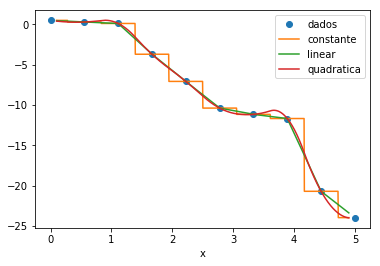

In [32]:
import numpy as np
import scipy.interpolate
import pylab

def cria_dados(n):
    """Dado um inteiro n, retorne n pontos
    x e valores y como um numpy.array."""
    xmax = 5.
    x = np.linspace(0, xmax, n)
    y = - x**2
    
    # faça os dados dos pontos x um tanto irregulares
    y += 1.5 * np.random.normal(size=len(x))
    return x, y

# programa principal
n = 10
x, y = cria_dados(n)

# usa uma malha mais fina e irregular para a plotagem
xfine = np.linspace(0.1, 4.9, n * 100)

# interpola com função constante por partes (p=0)
y0 = scipy.interpolate.interp1d(x, y, kind='nearest')

# interpola com função linear por partes (p=1)
y1 = scipy.interpolate.interp1d(x, y, kind='linear')

# interpola com função quadrática por partes (p=2)
y2 = scipy.interpolate.interp1d(x, y, kind='quadratic')

pylab.plot(x, y, 'o', label='dados')
pylab.plot(xfine, y0(xfine), label='constante')
pylab.plot(xfine, y1(xfine), label='linear')
pylab.plot(xfine, y2(xfine), label='quadrática')
pylab.legend()
pylab.xlabel('x')

Ajuste de curva
-------------

Já vimos que podemos ajustar funções polinomiais a um conjunto de dados usando a função `numpy.polyfit`. Aqui, apresentamos um algoritmo de ajuste de curva mais genérico.

O SciPy fornece uma função um pouco genérica (baseada no algoritmo de Levenberg-Marquardt) através do `scipy.optimize.curve_fit` para ajustar uma determinada função (Python) a um conjunto de dados. O pressuposto é que temos um conjunto de dados com pontos $x_1, x_2, ... x_N$ e com valores de função correspondentes $y_i$ dependentes de $x_i$, tal que $y_i = f(x_i,\textbf{p})$. Queremos determinar o vetor de parâmetros $\textbf{p} = (p_1, p_2, \dots, p_k)$ para que $r$, a soma dos resíduos, seja a menor possível:

$$r = \sum \limits_{i = 1}^N \left (y_i - f(x_i,\textbf{p}) \right)^2$$

O ajuste da curva é de uso particular se os dados forem contaminados por ruídos: para um dado $x_i$ e $y_i = f(x_i, \textbf{p})$, temos um termo de erro (desconhecido) $\epsilon_i$ para que $y_i = f(x_i,\textbf{p}) + \epsilon_i$.

Utilizamos o seguinte exemplo para esclarecer isso:
$$f(x,\textbf{p}) = a \exp(-bx) + c, \quad \mathrm{i.e.} \quad \textbf{p} = (a, b, c)$$

Os parâmetros ótimos são a=2.26288, b=1.50872, and c=0.605159


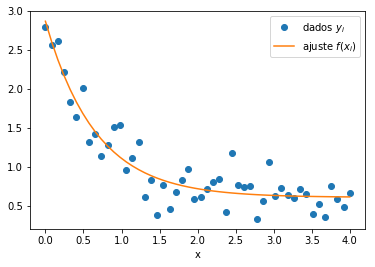

In [5]:
import numpy as np
from scipy.optimize import curve_fit


def f(x, a, b, c):
    """Ajusta função  y=f(x,p) com parâmetros p=(a,b,c). """
    return a * np.exp(- b * x) + c

# cria dados aleatórios
x = np.linspace(0, 4, 50)
y = f(x, a=2.5, b=1.3, c=0.5)

# adiciona ruído
yi = y + 0.2 * np.random.normal(size=len(x))

# chama a função de ajuste
popt, pcov = curve_fit(f, x, yi)
a, b, c = popt
print("Os parâmetros ótimos são a=%g, b=%g, and c=%g" % (a, b, c))

# plotagem
import pylab
yfitted = f(x, *popt)   # equivalente a f(x, popt[0], popt[1], popt[2])
pylab.plot(x, yi, 'o', label='dados $y_i$')
pylab.plot(x, yfitted, '-', label='ajuste $f(x_i)$')
pylab.xlabel('x')
pylab.legend()

Observe que no código-fonte acima, definimos a função de ajuste $y = f(x)$ através do código Python. Podemos, portanto, ajustar funções (quase) arbitrárias usando o método `curve_fit`.

A função `curve_fit` retorna uma tupla `popt, pcov`. A primeira entrada `popt` contém uma tupla dos parâmetros ótimos (no sentido de que estes minimizam o valor $r$). A segunda entrada contém a matriz de covariância para todos os parâmetros. As diagonais fornecem a variância dos parâmetro estimados.

Para que o processo de ajuste de curva funcione, o algoritmo de Levenberg-Marquardt precisa iniciar o processo de ajuste com palpites iniciais para os parâmetros finais. Se estes não forem especificados (como no exemplo acima), o valor "1.0" é usado para o palpite inicial.

Se o algoritmo falhar em obter uma função para os dados (mesmo que a função descreva os dados razoavelmente), precisamos dar ao algoritmo melhores estimativas para os parâmetros iniciais. Para o exemplo mostrado acima, podemos dar as estimativas para a função `curve_fit` mudando a linha

```python
Popt, pcov = curve_fit (f, x, yi)
```
para

```python
Popt, pcov = curve_fit (f, x, yi, p0 = (2,1,0.6))
```

se nossos palpites iniciais fossem $a = 2$, $b = 1$ e $c = 0.6$. Uma vez que tomamos o algoritmo "aproximadamente na área correta" no espaço de parâmetros, o ajuste geralmente funciona bem.

Transformadas de Fourier
------------------

No exemplo seguinte, criamos um sinal como uma superposição de uma onda senoidal de 50 Hz e 70 Hz (com uma ligeira mudança de fase entre eles). Então, aplicamos a transformada de Fourier no sinal e plotamos o valor absoluto dos coeficientes (complexos) da transformada discreta de Fourier pela freqüência. Esperamos ver picos em 50Hz e 70Hz.

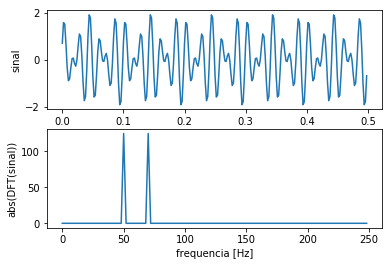

In [34]:
import scipy
import matplotlib.pyplot as plt
pi = scipy.pi

signal_length = 0.5   # [segundos]
sample_rate=500       # taxa de amostragem [Hz]
dt = 1./sample_rate   # tempo entre as duas amostras[s]

df = 1/signal_length  # frequência entre pontos
                      # no domínio da frequência [Hz] 
t=scipy.arange(0,signal_length,dt) # vetor tempo
n_t=len(t)            # comprimento do vetor de tempo

# cria sinal
y=scipy.sin(2*pi*50*t)+scipy.sin(2*pi*70*t+pi/4)

# calcula a transformada de Fourier
f=scipy.fft(y)

# opera sobre as frequências significativas na transformada de Fourier
freqs=df*scipy.arange(0,(n_t-1)/2.,dtype='d') # d = float com precisão dupla
n_freq=len(freqs)

# plota dados de entrada x tempo
plt.subplot(2,1,1)
plt.plot(t,y,label='dados de entrada')
plt.xlabel('tempo [s]')
plt.ylabel('sinal')

# plota espectro de frequências
plt.subplot(2,1,2)
plt.plot(freqs,abs(f[0:n_freq]),
         label='abs(transformada Fourier)')
plt.xlabel('frequência [Hz]')
plt.ylabel('abs(DFT(sinal))')

O gráfico inferior mostra a transformada discreta de Fourier (DFT) calculada a partir dos dados mostrados no gráfico superior.

Otimização
------------

Muitas vezes precisamos encontrar o máximo ou mínimo de uma função particular $f(x)$, onde $f$ é uma função escalar, mas $x$ poderia ser um vetor. As aplicações típicas são a minimização de algumas variáveis, tais como custo, risco e erro, ou a maximização de produtividade, eficiência e lucro. Rotinas de otimização normalmente fornecem um método para minimizar uma determinada função: se precisamos maximizar $f(x)$, criamos uma nova função $g(x)$ que inverte o sinal de $f$, ou seja, $g(x) = - f(x)$ e minimizamos $g(x)$.

Abaixo, damos um exemplo mostrando (i) a definição da função de teste e (ii) a chamada da função `scipy.optimize.fmin`, que toma como argumento a função $f$ a ser minimizada e um valor inicial $x_0$ a partir do qual se inicia a busca pelo mínimo, e retorna o valor de $x$ para o qual $f(x)$ é (localmente) minimizado. Normalmente, a busca pelo mínimo é uma busca local, i.e, o algoritmo segue o gradiente local. Nós repetimos a busca pelo mínimo para dois valores ($x_0 = 1.0$ e $x_0 = 2.0$, respectivamente) para demonstrar que, dependendo do valor de partida, podemos encontrar diferentes mínimos para a função $f$.

A maioria dos comandos (após as duas chamadas de `fmin`) no arquivo `fmin1.py` cria o gráfico da função, os pontos de partida para as buscas e o mínimo obtido:

Optimization terminated successfully.
         Current function value: -2.023866
         Iterations: 16
         Function evaluations: 32
Busca iniciada em x=1., minimo é [ 0.23964844]
Optimization terminated successfully.
         Current function value: -1.000529
         Iterations: 16
         Function evaluations: 32
Busca iniciada em x=2., minimo é [ 3.13847656]


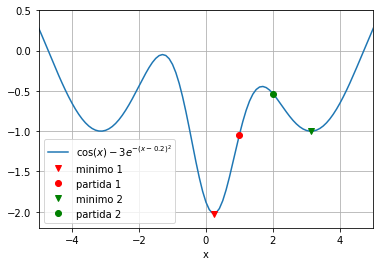

In [6]:
from scipy import arange, cos, exp
from scipy.optimize import fmin
import pylab

def f(x):
    return cos(x) - 3 * exp( -(x - 0.2) ** 2)

# encontra mínimos de f(x),
# começa de 1.0 e 2.0 respectivamente
minimum1 = fmin(f, 1.0)
print("Busca iniciada em x=1., minimo é", minimum1)
minimum2 = fmin(f, 2.0)
print("Busca iniciada em x=2., minimo é", minimum2)

# plota função
x = arange(-10, 10, 0.1)
y = f(x)
pylab.plot(x, y, label='$\cos(x)-3e^{-(x-0.2)^2}$')
pylab.xlabel('x')
pylab.grid()
pylab.axis([-5, 5, -2.2, 0.5])

# adiciona minimo1 para plot
pylab.plot(minimum1, f(minimum1), 'vr',
           label='minimo 1')
# adiciona ponto de partida 1 para plot
pylab.plot(1.0, f(1.0), 'or', label='partida 1')

# adiciona minimo2 para plot
pylab.plot(minimum2,f(minimum2),'vg',\
           label='minimo 2')

# adiciona ponto de partida 2 para plot
pylab.plot(2.0,f(2.0),'og',label='partida 2')

pylab.legend(loc='lower left')

A chamada da função `fmin` produzirá algum diagnóstico de saída, como você pode ver acima.

##### Valor de retorno de `fmin`

Note que o valor de retorno da função `fmin` é um `array` do numpy que - para o exemplo acima - contém apenas um número já que temos um único parâmetro (aqui $x$) para variar. Em geral, `fmin` pode ser usada para encontrar o mínimo em um espaço de parâmetros de dimensão superior se houver vários parâmetros. Nesse caso, o `array` numpy conteria aqueles parâmetros que minimizam a função objetivo. A função objetivo $f(x)$ tem que retornar um escalar mesmo que haja mais parâmetros, ou seja, mesmo se $x$ for um vetor.

Outros métodos numéricos
-----------------------

SciPy e NumPy proporcionam o acesso a um grande número de outros algoritmos numéricos, incluindo interpolação, transformadas de Fourier, otimização, funções especiais (tais como funções de Bessel), processamento de sinais e filtros, geração de números aleatórios, e mais. Você pode começar a explorar as capacidades desses dois módulos usando a função `help` ou a documentação fornecida na web.

scipy.io: entrada-saída no SciPy
----------------------------

O SciPy fornecem rotinas para ler e escrever arquivos `.mat` do Matlab. Aqui está um exemplo de criação de um arquivo compatível com Matlab armazenando uma matriz (1x11), e posterior leitura desses dados em uma matriz numpy do Python usando a biblioteca de entrada-saída do SciPy:

Primeiro criamos um arquivo `.mat` no Octave (Octave é, na maioria dos casos, compatível com Matlab):

```octave
octave: 1> a = -1: 0,5: 4
a =
Columns 1 through 6:
    -1,0000 -0,5000 0,0000 0,5000 1,0000 1,5000
Columns 7 through 11:
    2,0000 2,5000 3,0000 3,5000 4,0000
octave: 2> save -6% octave_a.mat a     % salva como versão 6
```

Então, carregamos este array no python:

In [36]:
from scipy.io import loadmat
mat_contents = loadmat('static/data/octave_a.mat')

In [37]:
mat_contents

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, written by Octave 4.0.3, 2017-06-29 01:52:49 UTC',
 '__version__': '1.0',
 'a': array([[-1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ]])}

In [38]:
mat_contents['a']

array([[-1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ]])

A função `loadmat` retorna um dicionário: a chave (*key*) para cada item no dicionário é uma *string* cujo nome é o mesmo da matriz que foi salva no Matlab.

Um arquivo Matlab pode conter vários *arrays*. Cada um deles é apresentado por um par chave-valor (*key:value*) no dicionário.

Vamos salvar dois arrays a partir do Python para demonstrar isso:

In [39]:
import scipy.io
import numpy as np

# cria dois arrays numpy
a = np.linspace(0, 50, 11)
b = np.ones((4, 4))

# salva como arquivo mat
# cria dicionario para savemat
tmp_d = {'a': a,
         'b': b}
scipy.io.savemat('static/data/a_b.mat', tmp_d)

This program creates the file `a_b.mat`, which we can subsequently read using Matlab or here Octave:

Este programa cria o arquivo `a_b.mat`, que podemos subsequentemente ler usando o Matlab ou

    HAL47:code fangohr$ octave
    GNU Octave, version 3.2.4
    Copyright (C) 2009 John W. Eaton and others.
    <snip>

    octave:1> whos
    Variables in the current scope:

      Attr Name        Size                     Bytes  Class
      ==== ====        ====                     =====  ===== 
           ans         1x11                        92  cell

    Total is 11 elements using 92 bytes

    octave:2> load data.mat
    octave:3> whos
    Variables in the current scope:

      Attr Name        Size                     Bytes  Class
      ==== ====        ====                     =====  ===== 
           a          11x1                         88  double
           ans         1x11                        92  cell
           b           4x4                        128  double

    Total is 38 elements using 308 bytes

    octave:4> a
    a =

        0
        5
       10
       15
       20
       25
       30
       35
       40
       45
       50

    octave:5> b
    b =

       1   1   1   1
       1   1   1   1
       1   1   1   1
       1   1   1   1

Note que há outras funções para leitura/escrita em formatos usados por IDL, Netcdf e outros na `scipy.io`.

Para saber mais → veja [Tutorial Scipy](http://docs.scipy.org/doc/scipy/reference/tutorial/io.html).